In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
from tqdm import tqdm

In [2]:
df2018 = pd.read_csv("/Users/victor/Documents/dataset/Combined_Flights_2018.csv")
df2019 = pd.read_csv("/Users/victor/Documents/dataset/Combined_Flights_2019.csv")
df2020 = pd.read_csv("/Users/victor/Documents/dataset/Combined_Flights_2020.csv")
df2021 = pd.read_csv("/Users/victor/Documents/dataset/Combined_Flights_2021.csv")
df2022 = pd.read_csv("/Users/victor/Documents/dataset/Combined_Flights_2022.csv")

In [4]:
features = [
    "FlightDate",
    "Airline",
    "Origin",
    "Dest",
    "DepTime", 
    "DepDelayMinutes",
    "DepDelay",
    "ArrDelayMinutes",     # target variable (regression)
    "AirTime",
    "Distance",
    "CRSElapsedTime",
    "DayOfWeek",
    "Year",
    "Month",
    "Tail_Number",
    "Flight_Number_Operating_Airline",
    "OriginAirportID",
    "DestAirportID",
    "DepDel15",
    "DepartureDelayGroups",
    "TaxiOut",
    "CRSArrTime",
    "ArrDelay",
    "DistanceGroup"    # every 250 miles
]

In [5]:
print("Before :", len(df2018))
df2018 = df2018[df2018["Airline"] == "Delta Air Lines Inc."] # Keep only Delta flights
df2018.dropna(inplace=True) # Drop Nans
df2018 = df2018[features] # Keep only selected columns
print("After :", len(df2018))

print("Before :", len(df2019))
df2019 = df2019[df2019["Airline"] == "Delta Air Lines Inc."] # Keep only Delta flights
df2019.dropna(inplace=True) # Drop Nans
df2019 = df2019[features] # Keep only selected columns
print("After :", len(df2019))

print("Before :", len(df2020))
df2020 = df2020[df2020["Airline"] == "Delta Air Lines Inc."] # Keep only Delta flights
df2020.dropna(inplace=True) # Drop Nans
df2020 = df2020[features] # Keep only selected columns
print("After :", len(df2020))

print("Before :", len(df2021))
df2021 = df2021[df2021["Airline"] == "Delta Air Lines Inc."] # Keep only Delta flights
df2021.dropna(inplace=True) # Drop Nans
df2021 = df2021[features] # Keep only selected columns
print("After :", len(df2021))

print("Before :", len(df2022))
df2022 = df2022[df2022["Airline"] == "Delta Air Lines Inc."] # Keep only Delta flights
df2022.dropna(inplace=True) # Drop Nans
df2022 = df2022[features] # Keep only selected columns
print("After :", len(df2022))
    
# Merge all datasets together
df = pd.concat([df2018, df2019, df2020, df2021, df2022])

# Save final dataset to CSV
df.to_csv("/Users/victor/Documents/dataset/delta_combined_flights_2018_2022.csv", index=False)

Before : 458840
After : 458840
Before : 8091684
After : 988025
Before : 5022397
After : 551517
Before : 6311871
After : 743048
Before : 4078318
After : 500710


In [6]:
df = pd.read_csv("/Users/victor/Documents/dataset/delta_combined_flights_2018_2022.csv")

In [8]:
len(df)

3242140

In [43]:
round(df2022.isna().sum() / len(df2022),3)

FlightDate                                 0.000
Airline                                    0.000
Origin                                     0.000
Dest                                       0.000
Cancelled                                  0.000
Diverted                                   0.000
CRSDepTime                                 0.000
DepTime                                    0.015
DepDelayMinutes                            0.015
DepDelay                                   0.015
ArrTime                                    0.016
ArrDelayMinutes                            0.018
AirTime                                    0.019
CRSElapsedTime                             0.000
ActualElapsedTime                          0.018
Distance                                   0.000
Year                                       0.000
Quarter                                    0.000
Month                                      0.000
DayofMonth                                 0.000
DayOfWeek           

## Our role: 

Consultant for "Delta Air Lines Inc." 
We want to:
- Predict if a flight will be delayed or not at arrival
- Predict the delay time of a flight at arrival
- Find the most important possible recurrent reasons of delay

## To Do


- target variables: Cancelled (classification) and ArrDelayMinutes (regression)
- airtime: compute the average for each trip?
- ArrDelay: Compute the mean/median for each specific trip. Make sure that we have enough data points. 
- Drop the "Cancelled" rows

- Average delay per airline per flight per trip ---> score. Instead of Airline Name: avg airline delay in one column --> continuous variable.  If missing data --> 0.
- Check the different values Marketing_Airline_Network. PA1? PA2?
- Tail Number - One Aircraft. Compute the average delay of each particular aircraft. Instead of having the tail number, we have the average delay per "distances" of that aircraft.
- FlightNumber: Compute the average delay per flight number.
- OriginAirportID: Compute the average delay per airport.


In [17]:
df2022.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2018-01-23,Endeavor Air Inc.,ABY,ATL,False,False,1202,1157.0,0.0,-5.0,1256.0,0.0,38.0,62.0,59.0,145.0,2018,1,1,23,2,DL,DL_CODESHARE,19790,DL,3298,9E,20363,9E,N8928A,3298,10146,1014602,30146,"Albany, GA",GA,13,Georgia,34,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,-1.0,1200-1259,14.0,1211.0,1249.0,7.0,1304,-8.0,0.0,-1.0,1300-1359,1,0.0
1,2018-01-24,Endeavor Air Inc.,ABY,ATL,False,False,1202,1157.0,0.0,-5.0,1258.0,0.0,36.0,62.0,61.0,145.0,2018,1,1,24,3,DL,DL_CODESHARE,19790,DL,3298,9E,20363,9E,N800AY,3298,10146,1014602,30146,"Albany, GA",GA,13,Georgia,34,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,-1.0,1200-1259,13.0,1210.0,1246.0,12.0,1304,-6.0,0.0,-1.0,1300-1359,1,0.0
2,2018-01-25,Endeavor Air Inc.,ABY,ATL,False,False,1202,1153.0,0.0,-9.0,1302.0,0.0,40.0,62.0,69.0,145.0,2018,1,1,25,4,DL,DL_CODESHARE,19790,DL,3298,9E,20363,9E,N8836A,3298,10146,1014602,30146,"Albany, GA",GA,13,Georgia,34,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,-1.0,1200-1259,18.0,1211.0,1251.0,11.0,1304,-2.0,0.0,-1.0,1300-1359,1,0.0
3,2018-01-26,Endeavor Air Inc.,ABY,ATL,False,False,1202,1150.0,0.0,-12.0,1253.0,0.0,35.0,62.0,63.0,145.0,2018,1,1,26,5,DL,DL_CODESHARE,19790,DL,3298,9E,20363,9E,N800AY,3298,10146,1014602,30146,"Albany, GA",GA,13,Georgia,34,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,-1.0,1200-1259,17.0,1207.0,1242.0,11.0,1304,-11.0,0.0,-1.0,1300-1359,1,0.0
4,2018-01-27,Endeavor Air Inc.,ABY,ATL,False,False,1400,1355.0,0.0,-5.0,1459.0,0.0,36.0,60.0,64.0,145.0,2018,1,1,27,6,DL,DL_CODESHARE,19790,DL,3298,9E,20363,9E,N8839E,3298,10146,1014602,30146,"Albany, GA",GA,13,Georgia,34,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,-1.0,1400-1459,17.0,1412.0,1448.0,11.0,1500,-1.0,0.0,-1.0,1500-1559,1,0.0


<AxesSubplot: >

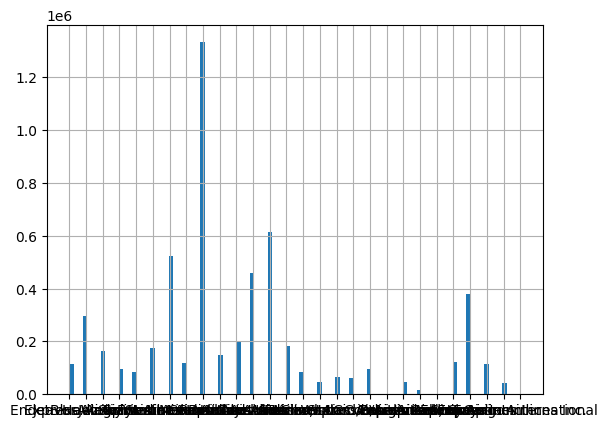

In [48]:
# see the repartition of values for DepTime on histogram
df2022["Airline"].hist(bins=100)

In [49]:
df2022["Airline"].value_counts()

Southwest Airlines Co.                       1331609
United Air Lines Inc.                         614915
SkyWest Airlines Inc.                         522086
Delta Air Lines Inc.                          458840
American Airlines Inc.                        378722
JetBlue Airways                               297758
Republic Airlines                             197448
Alaska Airlines Inc.                          182705
Spirit Air Lines                              174129
ExpressJet Airlines Inc.                      161955
Mesa Airlines Inc.                            149840
Envoy Air                                     123437
Frontier Airlines Inc.                        117523
Endeavor Air Inc.                             115924
Comair Inc.                                   113211
Air Wisconsin Airlines Corp                    95565
Allegiant Air                                  95192
Horizon Air                                    83936
Hawaiian Airlines Inc.                        

<AxesSubplot: ylabel='Frequency'>

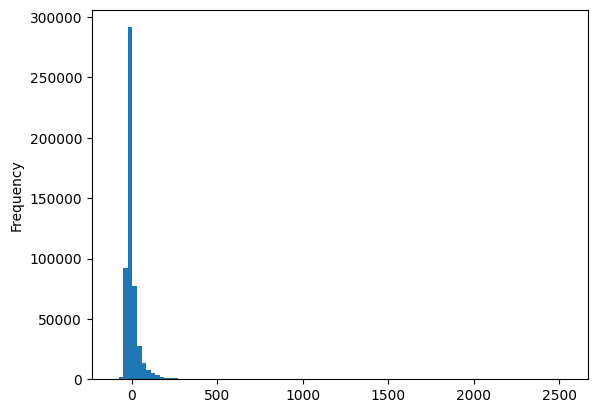

In [3]:
# check the distribution of cancelled flights
df['Cancelled'].value_counts()

# check distribution of ArrDelay
df['ArrDelay'].describe()

# check distribution of ArrDelay plot
df['ArrDelay'].plot.hist(bins=100)


In [4]:
df.head(25)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Originally_Scheduled_Code_Share_Airline,DOT_ID_Originally_Scheduled_Code_Share_Airline,IATA_Code_Originally_Scheduled_Code_Share_Airline,Flight_Num_Originally_Scheduled_Code_Share_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Duplicate,Unnamed: 119
0,2022,1,1,6,4,2022-01-06,DL,DL,19790,DL,1581,NaN,NaN,NaN,NaN,DL,19790,DL,N315DN,1581,11697,1169706,32467,FLL,"Fort Lauderdale, FL",FL,12,Florida,33,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,1126,NaN,NaN,NaN,NaN,NaN,1100-1159,NaN,NaN,NaN,NaN,1419,NaN,NaN,NaN,NaN,NaN,1400-1459,1.0,A,0.0,173.0,NaN,NaN,1.0,1076.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2022,1,1,6,4,2022-01-06,DL,DL,19790,DL,1582,NaN,NaN,NaN,NaN,DL,19790,DL,N545US,1582,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,11697,1169706,32467,FLL,"Fort Lauderdale, FL",FL,12,Florida,33,1631,1627.0,-4.0,0.0,0.0,-1.0,1600-1659,15.0,1642.0,1815.0,5.0,1821,1820.0,-1.0,0.0,0.0,-1.0,1800-1859,0.0,NaN,0.0,110.0,113.0,93.0,1.0,581.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2022,1,1,6,4,2022-01-06,DL,DL,19790,DL,1582,NaN,NaN,NaN,NaN,DL,19790,DL,N545US,1582,11697,1169706,32467,FLL,"Fort Lauderdale, FL",FL,12,Florida,33,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,1931,1929.0,-2.0,0.0,0.0,-1.0,1900-1959,13.0,1942.0,2105.0,10.0,2127,2115.0,-12.0,0.0,0.0,-1.0,2100-2159,0.0,NaN,0.0,116.0,106.0,83.0,1.0,581.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2022,1,1,6,4,2022-01-06,DL,DL,19790,DL,1583,NaN,NaN,NaN,NaN,DL,19790,DL,N345NB,1583,11697,1169706,32467,FLL,"Fort Lauderdale, FL",FL,12,Florida,33,14492,1449202,34492,RDU,"Raleigh/Durham, NC",NC,37,North Carolina,36,1024,1019.0,-5.0,0.0,0.0,-1.0,1000-1059,17.0,1036.0,1209.0,3.0,1227,1212.0,-15.0,0.0,0.0,-1.0,1200-1259,0.0,NaN,0.0,123.0,113.0,93.0,1.0,680.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [24]:
df.shape

(563737, 62)

In [14]:
# remove columns having more than 100000 nan values
df = df.dropna(axis=1, thresh=100000)

# drop these columns CarrierDelay	WeatherDelay	NASDelay	SecurityDelay	LateAircraftDelay	
df = df.drop(['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], axis=1)

In [18]:
# drop rows with more than 5 Nan values
df = df.dropna(axis=0, thresh=2)

In [20]:
df.isna().sum() / len(df) * 100

Year                                       0.000000
Quarter                                    0.000000
Month                                      0.000000
DayofMonth                                 0.000000
DayOfWeek                                  0.000000
FlightDate                                 0.000000
Marketing_Airline_Network                  0.000000
Operated_or_Branded_Code_Share_Partners    0.000000
DOT_ID_Marketing_Airline                   0.000000
IATA_Code_Marketing_Airline                0.000000
Flight_Number_Marketing_Airline            0.000000
Operating_Airline                          0.000000
DOT_ID_Operating_Airline                   0.000000
IATA_Code_Operating_Airline                0.000000
Tail_Number                                1.874633
Flight_Number_Operating_Airline            0.000000
OriginAirportID                            0.000000
OriginAirportSeqID                         0.000000
OriginCityMarketID                         0.000000
Origin      